Worked on by Caleb, Daniel, and Huan

Data Set Used: https://www.kaggle.com/code/harisyammnv/liver-disease-prediction/data

In [293]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Goal: To predict whether or not a patient has a liver diease

In [294]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score

ld_df = pd.read_csv('/content/drive/MyDrive/indian_liver_patient.csv')

In [295]:
ld_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [296]:
ld_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


When looking at the data set, 1 means that they doesn't have any liver disease, 2 means that they does have a liver disease

In [297]:
ld_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [298]:
ld_df.dropna(axis=0)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [299]:
type(ld_df.Albumin_and_Globulin_Ratio)

pandas.core.series.Series

In [300]:
ld_df = pd.get_dummies(data= ld_df, columns= ['Gender'])

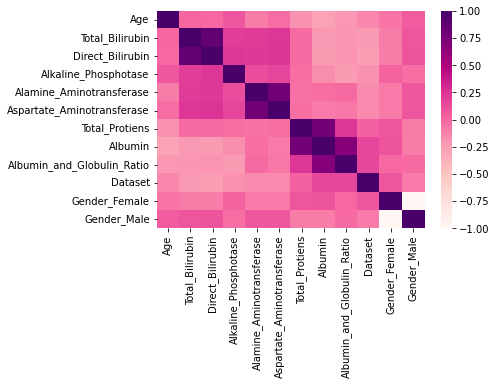

In [301]:
sns.heatmap(data= ld_df.corr(), cmap = 'RdPu')

Looking at the heatmap, there is more correlation between the dataset and Albumin along with Albumin and Globulin Ratio.

In [302]:
ld_df['Dataset'].value_counts()

1    416
2    167
Name: Dataset, dtype: int64

This shows that it is biased towards negative values, so we have to balance the data.

In [303]:
ld_minority = ld_df[(ld_df['Dataset']==2)]
ld_majority = ld_df[(ld_df['Dataset']==1)]

In [304]:
ld_minority_upsampled = resample(ld_minority, replace = True, 
                                      n_samples = 255, random_state = 42)
ld_majority_downsampled = resample(ld_majority, replace = True, 
                                      n_samples = 255, random_state = 42)
ld_upsampled = pd.concat([ld_minority_upsampled, ld_majority_downsampled])
ld_upsampled['Dataset'].value_counts()

2    255
1    255
Name: Dataset, dtype: int64

In [305]:
ld_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 364 to 563
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         510 non-null    int64  
 1   Total_Bilirubin             510 non-null    float64
 2   Direct_Bilirubin            510 non-null    float64
 3   Alkaline_Phosphotase        510 non-null    int64  
 4   Alamine_Aminotransferase    510 non-null    int64  
 5   Aspartate_Aminotransferase  510 non-null    int64  
 6   Total_Protiens              510 non-null    float64
 7   Albumin                     510 non-null    float64
 8   Albumin_and_Globulin_Ratio  507 non-null    float64
 9   Dataset                     510 non-null    int64  
 10  Gender_Female               510 non-null    uint8  
 11  Gender_Male                 510 non-null    uint8  
dtypes: float64(5), int64(5), uint8(2)
memory usage: 44.8 KB


In [306]:
x= ld_df[['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Gender_Female', 'Gender_Male']]
y= ld_df['Dataset']

In [307]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 42)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466 entries, 77 to 102
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         466 non-null    int64  
 1   Total_Bilirubin             466 non-null    float64
 2   Direct_Bilirubin            466 non-null    float64
 3   Alkaline_Phosphotase        466 non-null    int64  
 4   Alamine_Aminotransferase    466 non-null    int64  
 5   Aspartate_Aminotransferase  466 non-null    int64  
 6   Total_Protiens              466 non-null    float64
 7   Albumin                     466 non-null    float64
 8   Gender_Female               466 non-null    uint8  
 9   Gender_Male                 466 non-null    uint8  
dtypes: float64(4), int64(4), uint8(2)
memory usage: 33.7 KB


In [308]:
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [309]:
pred = clf.predict(x_test)
accuracy = accuracy_score(pred, y_test)
accuracy

0.7264957264957265

In [310]:
confusion_matrix1 = confusion_matrix(pred, y_test)
confusion_matrix1

array([[67, 12],
       [20, 18]])